# 연습문제 02 풀이

## #01. 패키지 준비하기

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

## #02. 데이터셋 준비하기

In [2]:
origin = read_excel("https://data.hossam.kr/F03/pima-indians.xlsx")

print(origin.info())

origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## #03. 데이터 전처리

### 결측치 확인

In [3]:
origin.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 명목형 변수 형변환

In [4]:
origin['Outcome'] = origin['Outcome'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    int64   
 2   BloodPressure             768 non-null    int64   
 3   SkinThickness             768 non-null    int64   
 4   Insulin                   768 non-null    int64   
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## #04. 탐색적 데이터 분석

### 기본통계 확인

In [5]:
origin.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


### 상자그림

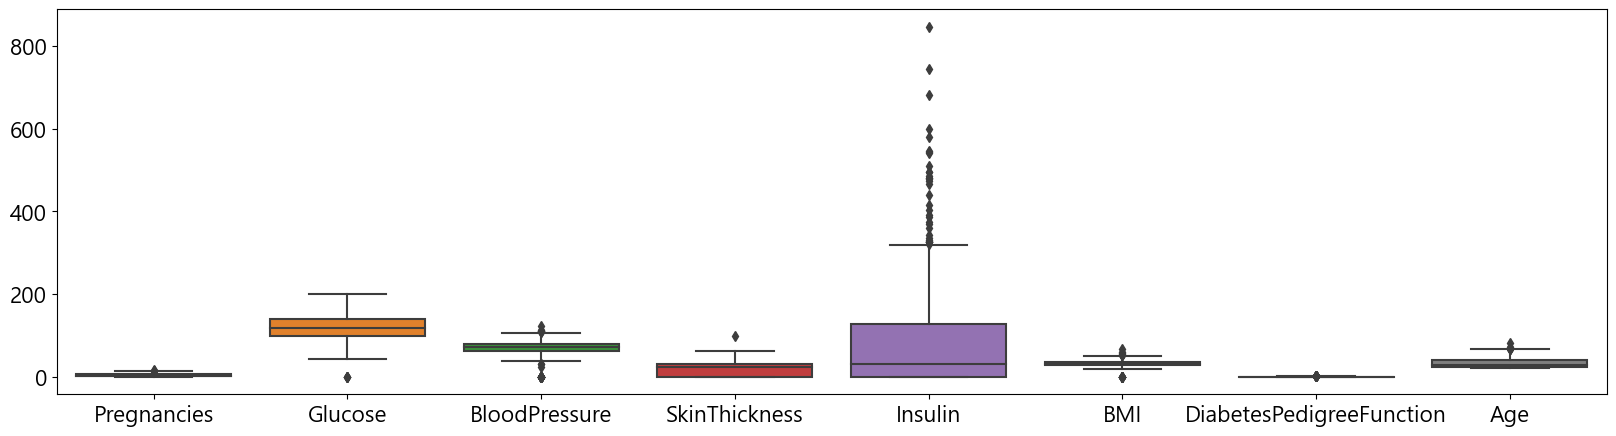

In [6]:
plt.figure(figsize=(20, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

> 데이터 분포가 서로 상이하므로 표준화가 필요하다고 판단

## #05. 데이터셋 분할하기

### 랜덤시드 고정

In [7]:
np.random.seed(777)

### 훈련 데이터(독립변수)와 레이블(종속변수) 구분하기

In [8]:
x = origin.drop('Outcome', axis=1)
y = origin[['Outcome']]
print(x.shape, y.shape)
y

(768, 8) (768, 1)


,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


### 데이터 표준화

In [9]:
x_scaller = StandardScaler()
x_scale = x_scaller.fit_transform(x)
x_scale_df = DataFrame(x_scale, columns=x.columns, index=x.index)
x_scale_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


### 훈련 데이터와 검증 데이터로 분할

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x_scale_df, y, test_size=0.3, random_state=777)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)
x_train

(537, 8) (231, 8) (537, 1) (231, 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
335,-1.141852,1.380375,0.356432,1.409094,1.521248,2.018958,-0.642912,-0.616111
130,0.046014,1.630752,0.046245,-0.410019,0.765836,-0.290972,-0.334860,-0.020496
255,-0.844885,-0.247076,-0.263941,0.907270,-0.692891,0.204013,0.214802,-1.041549
573,-0.547919,-0.716533,-0.470732,-0.221835,0.349057,0.343624,-0.827139,-0.956462
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
...,...,...,...,...,...,...,...,...
669,1.530847,1.036107,0.459827,0.593630,0.175399,-0.138669,-0.929823,1.000557
71,0.342981,0.566649,-0.263941,0.907270,0.522715,-0.430583,-0.183854,-0.616111
599,-0.844885,-0.372265,-1.608083,-0.159107,0.349057,-1.128639,-0.195934,-0.616111
571,-0.547919,0.284975,1.390387,-1.288212,-0.692891,-1.192099,-0.615731,-1.041549


## #06. 모델 개발

### 모델 정의

In [11]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(len(x_train.columns), )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 학습하기

In [12]:
result = model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_test), callbacks = [
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

Epoch 1/500
17/17 [==============================] - 1s 10ms/step - loss: 0.6787 - acc: 0.5698 - val_loss: 0.6534 - val_acc: 0.6320 - lr: 0.0010
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6354 - acc: 0.6611 - val_loss: 0.6162 - val_acc: 0.7229 - lr: 0.0010
Epoch 3/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6059 - acc: 0.6834 - val_loss: 0.5895 - val_acc: 0.7446 - lr: 0.0010
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5831 - acc: 0.7095 - val_loss: 0.5674 - val_acc: 0.7619 - lr: 0.0010
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5637 - acc: 0.7244 - val_loss: 0.5499 - val_acc: 0.7619 - lr: 0.0010
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5472 - acc: 0.7318 - val_loss: 0.5349 - val_acc: 0.7706 - lr: 0.0010
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5330 - acc: 0.7430 - val_loss: 0.5223 - val_acc: 0.7619 - lr

## #07. 학습 결과 평가

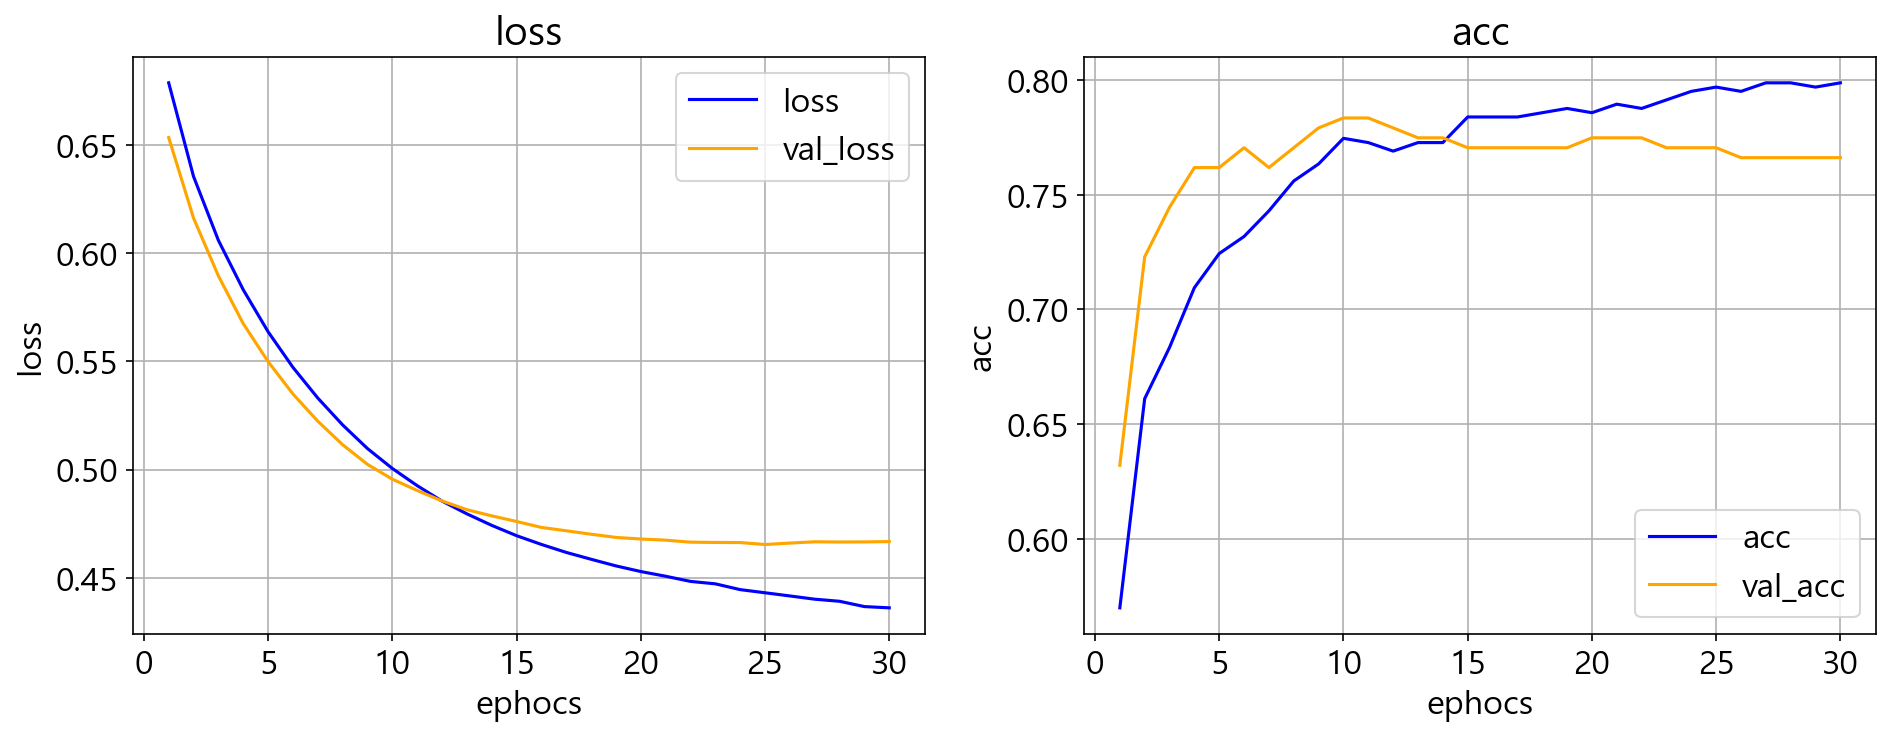

17/17 [==============================] - 0s 976us/step - loss: 0.4347 - acc: 0.7970
최종 훈련 손실률: 0.434674, 최종 훈련 정확도: 0.797020
8/8 [==============================] - 0s 0s/step - loss: 0.4667 - acc: 0.7662
최종 검증 손실률: 0.466725, 최종 검증 정확도: 0.766234


In [13]:
helper.tf_result_plot(result)

evaluate1 = model.evaluate(x_train, y_train)
print("최종 훈련 손실률: %f, 최종 훈련 정확도: %f" % (evaluate1[0], evaluate1[1]))

evaluate2 = model.evaluate(x_test, y_test)
print("최종 검증 손실률: %f, 최종 검증 정확도: %f" % (evaluate2[0], evaluate2[1]))

## #08. 학습 결과 적용

### 테스트 데이터에 대한 예측 결과 산정

In [14]:
train_pred = model.predict(x_train)
data_count, case_count = train_pred.shape
print("%d개의 훈련 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(train_pred)

17/17 [==============================] - 0s 274us/step
537개의 훈련 데이터가 1개의 경우의 수를 갖는다.
[[6.75221443e-01]
 [7.53834069e-01]
 [1.81017101e-01]
 [9.20954719e-02]
 [3.24859530e-01]
 [5.03216572e-02]
 [1.93241075e-01]
 [4.06970173e-01]
 [5.79768121e-01]
 [1.82705581e-01]
 [4.64651883e-01]
 [2.70043701e-01]
 [4.07965213e-01]
 [8.89587798e-04]
 [7.63071060e-01]
 [4.21360344e-01]
 [1.67309701e-01]
 [5.28254926e-01]
 [3.15652937e-02]
 [8.42143223e-02]
 [1.53397113e-01]
 [2.53751695e-01]
 [2.74948359e-01]
 [2.32931256e-01]
 [1.43317893e-01]
 [1.07799761e-01]
 [2.45931670e-01]
 [1.50526715e-02]
 [3.70859683e-01]
 [3.34608406e-02]
 [2.44192109e-01]
 [2.04290345e-01]
 [1.64972767e-01]
 [6.74694955e-01]
 [7.97191679e-01]
 [7.00256705e-01]
 [4.07663211e-02]
 [2.96216339e-01]
 [4.38328743e-01]
 [1.83319792e-01]
 [2.44921416e-01]
 [1.44401774e-01]
 [1.95486136e-02]
 [3.25227022e-01]
 [2.60691699e-02]
 [4.23924476e-01]
 [5.93420506e-01]
 [6.27775729e-01]
 [1.36596099e-01]
 [5.03348708e-01]
 [4.26254719e-0

In [15]:
train_df = DataFrame({
    '관측치': y_train['Outcome'],
    '예측치': np.round(train_pred.flatten())
})

train_df

,관측치,예측치
335,0,1.0
130,1,1.0
255,1,0.0
573,0,0.0
764,0,0.0
...,...,...
669,0,1.0
71,0,0.0
599,0,0.0
571,0,0.0


### 검증 데이터에 대한 예측 결과 산정

In [16]:
test_pred = model.predict(x_test)
data_count, case_count = test_pred.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(test_pred)

8/8 [==============================] - 0s 712us/step


231개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[0.4461367 ]
 [0.8831131 ]
 [0.9526625 ]
 [0.21075033]
 [0.2768421 ]
 [0.6028363 ]
 [0.5853902 ]
 [0.0827531 ]
 [0.9213795 ]
 [0.12911776]
 [0.05032728]
 [0.13951929]
 [0.02136537]
 [0.04861246]
 [0.20418486]
 [0.08990809]
 [0.10502959]
 [0.22351368]
 [0.8875407 ]
 [0.17252983]
 [0.0839563 ]
 [0.4654115 ]
 [0.89444965]
 [0.7916202 ]
 [0.12871441]
 [0.23063087]
 [0.04714285]
 [0.69566154]
 [0.04822744]
 [0.53951716]
 [0.20903973]
 [0.12307375]
 [0.20691252]
 [0.02088459]
 [0.20108901]
 [0.03949243]
 [0.15711533]
 [0.14910729]
 [0.66990066]
 [0.01012264]
 [0.1715505 ]
 [0.272509  ]
 [0.05314358]
 [0.8683881 ]
 [0.688051  ]
 [0.0133241 ]
 [0.36111382]
 [0.16956864]
 [0.05536766]
 [0.10449664]
 [0.7241407 ]
 [0.06483032]
 [0.02230805]
 [0.33598924]
 [0.19416964]
 [0.0810506 ]
 [0.0449029 ]
 [0.94094473]
 [0.5858513 ]
 [0.8755354 ]
 [0.40613183]
 [0.63548774]
 [0.8257948 ]
 [0.6635167 ]
 [0.34882024]
 [0.05981489]
 [0.02961624]
 [0.15204924]
 [0.00236008]
 [0.

### 결과 데이터 셋 구성

In [17]:
test_df = DataFrame({
    '관측치': y_test['Outcome'],
    '예측치': np.round(test_pred.flatten())
})

test_df

,관측치,예측치
387,1,0.0
43,1,1.0
408,1,1.0
262,0,0.0
533,0,0.0
...,...,...
46,0,0.0
290,0,0.0
418,0,0.0
434,0,0.0


### 결과 확인

In [18]:
logit = helper.tf_logit_result(model, result, x_train, y_train)
logit

17/17 [==============================] - 0s 766us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321 (1.25 KB)
Trainable params: 321 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
logit.cmdf

,Negative,Positive
True,300,68
False,41,128


In [20]:
logit.result_df.T

,0
정확도(Accuracy),0.797020
정밀도(Precision),0.757396
"재현율(Recall, TPR)",0.653061
"위양성율(Fallout, FPR)",0.120235
"특이성(Specificity, TNR)",0.879765
RAS,0.766413
f1_score,0.701370


In [21]:
logit.odds_rate_df

array([1.2892047], dtype=float32)